In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service
import pandas as pd
import os
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
df = pd.read_csv('realtor-data.zip.csv')

In [3]:
df.head()

brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN

In [4]:
df.drop(columns=['prev_sold_date'], inplace=True)

In [5]:
df.isnull().sum()

brokered_by      4533
status              0
price            1541
bed            481317
bath           511771
acre_lot       325589
street          10866
city             1407
state               8
zip_code          299
house_size     568484
dtype: int64

In [6]:
df_cleaned = df.dropna()

In [7]:
len(df_cleaned)

1354105

In [8]:
import pandas as pd
import numpy as np

df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'], 
                                    bins=[0, 500000, 1000000, 2000000, 5000000, np.inf],
                                    labels=['Affordable', 'Mid-range', 'High-end', 'Luxury', 'Ultra-Luxury'])

desired_locations = {
    'Montgomery Village': 'Maryland',
    'Orange': 'California', 
    'New Jersey': 'New Jersey' 
}

df_urban = df_cleaned[df_cleaned.apply(lambda row: (row['city'] == 'Montgomery Village' and row['state'] == 'Maryland') or
                                                 (row['city'] == 'Orange' and row['state'] == 'California') or
                                                 (row['state'] == 'New Jersey'), axis=1)]

df_urban.reset_index(drop=True, inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5136\476912027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],


In [9]:
df_urban = df_urban[['city','state','house_size','bed','bath','price','PriceSegment']]
df_urban

city       state  house_size  bed  bath      price PriceSegment
0      Burlington  New Jersey      1500.0  3.0   3.0   333490.0   Affordable
1          Avenel  New Jersey      1456.0  2.0   2.0   339900.0   Affordable
2          Avenel  New Jersey      1542.0  3.0   2.0   305100.0   Affordable
3          Avenel  New Jersey       925.0  3.0   1.0   205000.0   Affordable
4          Avenel  New Jersey      1870.0  3.0   3.0   325000.0   Affordable
...           ...         ...         ...  ...   ...        ...          ...
20038      Orange  California      1675.0  4.0   2.0  1050000.0     High-end
20039      Orange  California      1560.0  3.0   2.0   950000.0    Mid-range
20040      Orange  California      2233.0  4.0   3.0  1125000.0     High-end
20041      Orange  California      2588.0  4.0   3.0  1220000.0     High-end
20042      Orange  California      3033.0  4.0   3.0  1300000.0     High-end

[20043 rows x 7 columns]

In [10]:
con = sqlite3.connect('UrbanHouse.db')
cur = con.cursor()

In [11]:
%load_ext sql 

In [12]:
%sql sqlite:///UrbanHouse.db

In [13]:
df_urban.to_sql('UrbanArea',con,if_exists = 'replace',index = False)

20043

In [14]:
%%sql 
SELECT *
FROM UrbanArea
WHERE [price] >= 100000

 * sqlite:///UrbanHouse.db
Done.


[('Burlington', 'New Jersey', 1500.0, 3.0, 3.0, 333490.0, 'Affordable'),
 ('Avenel', 'New Jersey', 1456.0, 2.0, 2.0, 339900.0, 'Affordable'),
 ('Avenel', 'New Jersey', 1542.0, 3.0, 2.0, 305100.0, 'Affordable'),
 ('Avenel', 'New Jersey', 925.0, 3.0, 1.0, 205000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 1870.0, 3.0, 3.0, 325000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 1842.0, 4.0, 2.0, 440000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 1476.0, 3.0, 3.0, 399000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 7501.0, 3.0, 2.0, 340000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 1387.0, 5.0, 2.0, 484000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 2296.0, 4.0, 4.0, 525000.0, 'Mid-range'),
 ('Avenel', 'New Jersey', 720.0, 2.0, 1.0, 275000.0, 'Affordable'),
 ('Woodbridge', 'New Jersey', 1008.0, 3.0, 1.0, 325000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 3182.0, 5.0, 4.0, 799900.0, 'Mid-range'),
 ('Avenel', 'New Jersey', 1414.0, 3.0, 1.0, 375000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 2635.0, 5.0, 2.0, 545000.0, 'Mid-range'),
 ('Avenel', 'New Jersey', 2592.0, 5.0, 3.0, 615000.0, 'Mid-range'),
 ('Avenel', 'New Jersey', 862.0, 3.0, 1.0, 375000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 1950.0, 4.0, 2.0, 524999.0, 'Mid-range'),
 ('Avenel', 'New Jersey', 1199.0, 3.0, 2.0, 350000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 1232.0, 3.0, 2.0, 449000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 1620.0, 4.0, 4.0, 460000.0, 'Affordable'),
 ('Bayonne', 'New Jersey', 1924.0, 4.0, 3.0, 649000.0, 'Mid-range'),
 ('Bayonne', 'New Jersey', 1328.0, 3.0, 1.0, 545000.0, 'Mid-range'),
 ('Bayonne', 'New Jersey', 1315.0, 3.0, 3.0, 495000.0, 'Affordable'),
 ('Bayonne', 'New Jersey', 2275.0, 5.0, 3.0, 899000.0, 'Mid-range'),
 ('Bloomfield', 'New Jersey', 1400.0, 2.0, 4.0, 370000.0, 'Affordable'),
 ('Bloomfield', 'New Jersey', 3395.0, 6.0, 3.0, 610000.0, 'Mid-range'),
 ('Bloomfield', 'New Jersey', 1112.0, 2.0, 1.0, 215000.0, 'Affordable'),
 ('Bloomfield', 'New Jersey', 2371.0, 5.0, 3.0, 749000.0, 'Mid-range'),
 ('Bloomfield', 'New Jersey', 1232.0, 3.0, 3.0, 385000.0, 'Affordable'),
 ('Fairfield Twp', 'New Jersey', 2700.0, 4.0, 3.0, 350000.0, 'Affordable'),
 ('Fairfield', 'New Jersey', 2728.0, 3.0, 3.0, 764900.0, 'Mid-range'),
 ('Fairfield', 'New Jersey', 2006.0, 4.0, 3.0, 464900.0, 'Affordable'),
 ('Rockaway', 'New Jersey', 6000.0, 5.0, 4.0, 899000.0, 'Mid-range'),
 ('Boonton', 'New Jersey', 2080.0, 3.0, 3.0, 486000.0, 'Affordable'),
 ('Boonton Township', 'New Jersey', 15000.0, 6.0, 10.0, 2699000.0, 'Luxury'),
 ('Boonton Township', 'New Jersey', 1901.0, 3.0, 3.0, 499000.0, 'Affordable'),
 ('Boonton', 'New Jersey', 1377.0, 3.0, 3.0, 449999.0, 'Affordable'),
 ('Rockaway', 'New Jersey', 2630.0, 4.0, 3.0, 699000.0, 'Mid-range'),
 ('Boonton', 'New Jersey', 2386.0, 5.0, 3.0, 465000.0, 'Affordable'),
 ('Boonton', 'New Jersey', 1561.0, 3.0, 2.0, 525000.0, 'Mid-range'),
 ('Boonton Township', 'New Jersey', 2766.0, 7.0, 4.0, 1195000.0, 'High-end'),
 ('Boonton Township', 'New Jersey', 4241.0, 5.0, 5.0, 1189800.0, 'High-end'),
 ('Montville Township', 'New Jersey', 3935.0, 4.0, 5.0, 999999.0, 'Mid-range'),
 ('Boonton Township', 'New Jersey', 2650.0, 4.0, 3.0, 678000.0, 'Mid-range'),
 ('Boonton Township', 'New Jersey', 3799.0, 3.0, 4.0, 1049000.0, 'High-end'),
 ('Boonton', 'New Jersey', 2600.0, 6.0, 2.0, 600000.0, 'Mid-range'),
 ('Boonton', 'New Jersey', 2086.0, 4.0, 3.0, 595000.0, 'Mid-range'),
 ('Avenel', 'New Jersey', 1552.0, 3.0, 2.0, 335000.0, 'Affordable'),
 ('Avenel', 'New Jersey', 2456.0, 6.0, 4.0, 575000.0, 'Mid-range'),
 ('Bayonne', 'New Jersey', 1869.0, 5.0, 3.0, 599000.0, 'Mid-range'),
 ('Bayonne', 'New Jersey', 1104.0, 3.0, 2.0, 1495000.0, 'High-end'),
 ('Bloomfield', 'New Jersey', 2304.0, 5.0, 3.0, 475000.0, 'Affordable'),
 ('Bloomfield', 'New Jersey', 1720.0, 2.0, 3.0, 365000.0, 'Affordable'),
 ('Bloomfield', 'New Jersey', 1156.0, 2.0, 2.0, 499000.0, 'Affordable'),
 ('Bloomfield', 'New Jersey', 1280.0, 3.0, 2.0, 425000.0, 'Affordable'),
 ('Bloomfield', 'Ne

In [15]:
con.close()

# Phân tích giá nhà tại các khu vực ngoại ô

In [16]:
stats = df_urban.describe()

In [17]:
print('Thống kê mô tả tỏng quá bất động sản')
print(stats.to_string(float_format='{:.2f}'.format))

Thống kê mô tả tỏng quá bất động sản
       house_size      bed     bath       price
count    20043.00 20043.00 20043.00    20043.00
mean      2377.08     3.53     2.57   550975.31
std       4235.88     1.31     1.32   680402.52
min        165.00     1.00     1.00      500.00
25%       1345.00     3.00     2.00   268500.00
50%       1797.00     3.00     2.00   394900.00
75%       2496.00     4.00     3.00   599900.00
max     400149.00    47.00    39.00 24900000.00


In [18]:
# Độ biến thiên giá theo khu vực
price_variance_by_location = df_urban.groupby('state')['price'].var()

print(price_variance_by_location.to_string(float_format='{:.2f}'.format))

state
California   342953139278.73
Maryland      11976134438.43
New Jersey   463040938499.03


In [19]:
# Số lượng bất động sản theo khu vực
count_the_city = df['city'].value_counts()
count_the_city

city
Houston                        23862
Chicago                        18238
New York City                  12634
Jacksonville                   11743
Philadelphia                   10449
                               ...  
Angel Ifre                         1
Colfax County Moreno Valley        1
Little Sioux                       1
Trementina                         1
Kahlotus                           1
Name: count, Length: 20098, dtype: int64

In [20]:
# Hệ số biến thiên giá (coeefficient of variation) 
cv = df['price'].std() / df['price'].mean()
cv

4.080334803335655

In [21]:
# Độ phân tán giá
price_range = df_urban['price'].max() - df_urban['price'].min()

price_range

24899500.0

In [22]:
Q1 = df_urban['price'].quantile(0.25)
Q3 = df_urban['price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_urban[(df_urban['price'] < (Q1 - 1.5 * IQR)) | (df_urban['price'] > (Q3 + 1.5 * IQR))]

outliers

city       state  house_size  bed  bath      price  \
35     Boonton Township  New Jersey     15000.0  6.0  10.0  2699000.0   
41     Boonton Township  New Jersey      2766.0  7.0   4.0  1195000.0   
42     Boonton Township  New Jersey      4241.0  5.0   5.0  1189800.0   
51              Bayonne  New Jersey      1104.0  3.0   2.0  1495000.0   
78       North Caldwell  New Jersey      5431.0  6.0   7.0  2300000.0   
...                 ...         ...         ...  ...   ...        ...   
20032            Orange  California      2700.0  4.0   3.0  1340000.0   
20034            Orange  California      2555.0  5.0   3.0  1295888.0   
20040            Orange  California      2233.0  4.0   3.0  1125000.0   
20041            Orange  California      2588.0  4.0   3.0  1220000.0   
20042            Orange  California      3033.0  4.0   3.0  1300000.0   

      PriceSegment  
35          Luxury  
41        High-end  
42        High-end  
51        High-end  
78          Luxury  
...            ...  
20032     High-end  
20034     High-end  
20040     High-end  
20041     High-end  
20042     High-end  

[1583 rows x 7 columns]

In [23]:
# Độ lệch trung bình tuyệt đối (mean absolute deviation)
price_data = df_urban['price']
mean_price = price_data.mean()

mad = (price_data - mean_price).abs().mean()

mad


329799.8494271593

In [24]:
frequency = df_urban['PriceSegment'].value_counts()
frequency

PriceSegment
Affordable      13404
Mid-range        4977
High-end         1160
Luxury            429
Ultra-Luxury       73
Name: count, dtype: int64

In [25]:
# Hệ số tương quan giữa gía và diện tích
corr_price_area = df_urban['price'].corr(df_urban['house_size'])
corr_price_area

0.18712905455313364

In [26]:
# Hệ số tương quan giữa giá và phòng ngủ
corr_price_bed = df_urban['price'].corr(df_urban['bed'])
corr_price_bed

0.383837457875889

In [27]:
outliers_upper = df_urban[df_urban['price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df_urban[df_urban['price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper : {outliers_upper}')
print(f'Outliers lower : {outliers_lower}')

Outliers upper :                    city       state  house_size  bed  bath      price  \
35     Boonton Township  New Jersey     15000.0  6.0  10.0  2699000.0   
41     Boonton Township  New Jersey      2766.0  7.0   4.0  1195000.0   
42     Boonton Township  New Jersey      4241.0  5.0   5.0  1189800.0   
51              Bayonne  New Jersey      1104.0  3.0   2.0  1495000.0   
78       North Caldwell  New Jersey      5431.0  6.0   7.0  2300000.0   
...                 ...         ...         ...  ...   ...        ...   
20032            Orange  California      2700.0  4.0   3.0  1340000.0   
20034            Orange  California      2555.0  5.0   3.0  1295888.0   
20040            Orange  California      2233.0  4.0   3.0  1125000.0   
20041            Orange  California      2588.0  4.0   3.0  1220000.0   
20042            Orange  California      3033.0  4.0   3.0  1300000.0   

      PriceSegment  
35          Luxury  
41        High-end  
42        High-end  
51        High-end  
7

In [28]:
price_quantiles = df_urban['price'].quantile([0.25,0.5,0.7,1.0])
price_quantiles

0.25      268500.0
0.50      394900.0
0.70      549000.0
1.00    24900000.0
Name: price, dtype: float64

Text(0, 0.5, 'Giá BĐS trung bình (USD')

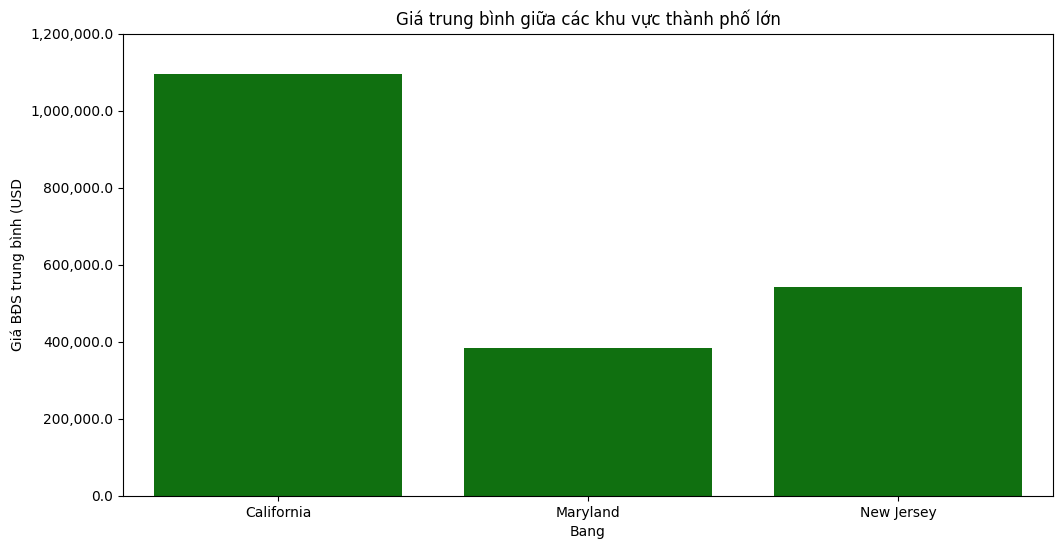

In [29]:
average_state = df_urban.groupby('state')['price'].mean()

plt.figure(figsize =(12,6))
sns.barplot(x =average_state.index, y =average_state.values, color = 'green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các khu vực thành phố lớn')
plt.xlabel('Bang')
plt.ylabel('Giá BĐS trung bình (USD')

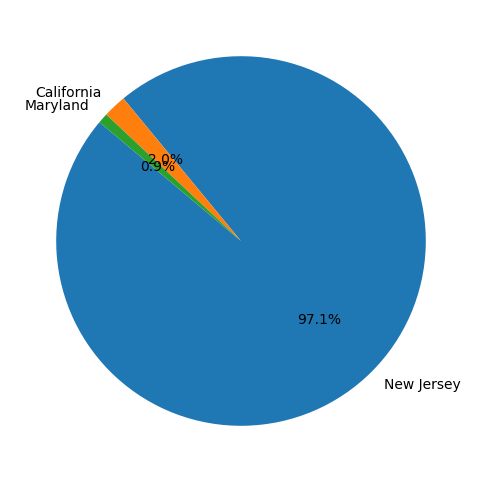

In [30]:
real_estate_counts = df_urban['state'].value_counts()
plt.figure(figsize = (12,6) )
plt.pie(real_estate_counts, labels = real_estate_counts.index, autopct = '%1.1f%%', startangle = 140);

In [31]:
x = df_urban[['house_size','bed', 'bath' ]]
y = df_urban[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
model =LinearRegression()
model.fit(x_train, y_train)
price_prediction = model.predict(x_test)

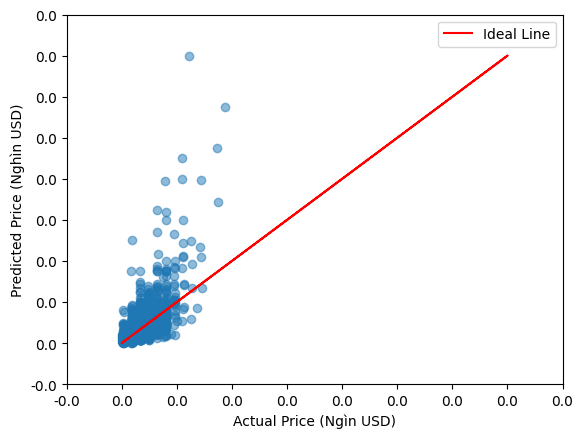

In [33]:
plt.scatter(x = price_prediction, y = y_test.values, alpha = 0.5)
plt.plot(y_test.values, y_test.values, color = 'red',label = 'Ideal Line' )

plt.ylabel('Predicted Price (Nghìn USD)')
plt.xlabel('Actual Price (Ngìn USD)')
plt.legend()

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in yticks]);

In [35]:
import geopandas as gpd
usa = gpd.read_file(r'D:\ASG_PRJ\Lab\Lab 3\Lab3\PRJ2\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp')
state_mapping = {
    'Connecticut': 'Connecticut', 'Florida': 'Florida', 'New Jersey': 'New Jersey',
    'Virginia': 'Virginia'
}
state_avg_price = df_urban.groupby('state')['price'].mean().reset_index()
state_avg_price.columns = ['name', 'price']
merged = usa.set_index('name').join(state_avg_price.set_index('name'))
fig, ax = plt.subplots(1, 1, figsize=(12,10))
merged.plot(column='price', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Phân phối giá trên map')
plt.show()


# Filter for the United States
usa = world[world['NAME'] == 'United States']

KeyError: "None of ['name'] are in the columns"